# Homework 02: Euler Method and 1D PDE
# Date: 10/03/2018
# Due: 10/13/2018; 10:30 PM
## Objectives: We will have more practices on numerical methods relevant to our previous assignments.

---
### Your name: Boyao Zhu

---
### Problem 1

### In our pre-class assignment (Day04), we used an existing direct matrix solver, "np.linalg.solve(Am, f)". Here, we want to write our own tridiagonal matrix solver for 1D Heat equation, and compare its performance against np.linalg.solve.

**The tridiagonal matrix solver is a variation from Gaussian elimination, for the special case where only the entries on the lower, main, and upper diagonals contain non-zero values.**

**In the code below, the operator matrix and force vector are provided. Do the following. **
1. **Get the computer time required for Python function, np.linalg.solve. **
1. **Finish the code for tridiagonal matrix solver using the algorithm on wikipedia (link given below), and compare your computer time to that from Python function.   **

https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm

time for linalg solver = 9.406058073043823
time for tridiagonal matrix solver = 0.036527156829833984


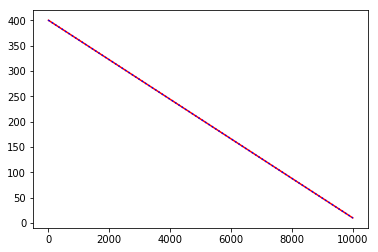

In [20]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import time as tm

%matplotlib inline

# set up matrix for 1D heat equation

# number of grids in 1D
nx = 10001

# create a matrix
Am = np.zeros((nx,nx))

# create the vector for the unknowns
x = np.zeros(nx)

# create the force vector
d = np.zeros(nx)

# Boundary conditions
d[0] = -400
d[nx-1] = -10

# fill the entries in the operator matrix
for n in range(nx):
    
    Am[n,n] = -2.
    if n > 0:
        Am[n-1,n] = 1.
        Am[n,n-1] = 1.

# walltime before matrix solving
cpu_tm_bg = tm.time()
                      
# #######################################################
# solve vector x using Python function
# #######################################################
sol = np.linalg.solve(Am, d)   

# walltime after matrix solving
cpu_tm_ed = tm.time()
print('time for linalg solver =',cpu_tm_ed-cpu_tm_bg)

# plotting
plt.plot(sol,'r')


# #######################################################
# tirdiagonal matrix solver
# #######################################################

#lists for stoting entries in the lower, main, and upper diagonals 
a = np.zeros(nx)
b = np.zeros(nx)
c = np.zeros(nx)

# walltime before matrix solving
cpu_tm_bg = tm.time()

# fill the lists of the lower, main, and upper diagonals 
for n in range(nx):
    
    # lower diagonal
    if n > 0:
        a[n] = Am[n,n-1]      # <== fill the blank
    
    # main diagonal
    b[n] = Am[n,n]
    
    # upper diagonal
    if n < nx-1:
        c[n] = Am[n,n+1]     # <== fill the blank

# tridiagonal matrix solver 
# forward sweep
#print (a, b, c)


cprime = np.zeros(nx-1)
cprime[0] = c[0]/b[0]
for n in range(1,nx-1):     # <== fill the blank
    cprime[n] = c[n]/(b[n]-a[n]*cprime[n-1])    # <== fill the blank
#print (cprime)

dprime = np.zeros(nx)
dprime[0] = d[0]/b[0]
for n in range(1,nx):      # <== fill the blank
    dprime[n] = (d[n]-a[n]*dprime[n-1])/(b[n]-a[n]*cprime[n-1])      # <== fill the blank
#print (dprime)   
# solving using backward substitute    
sol = np.zeros(nx)
sol[nx-1] = dprime[nx-1]
for n in range(nx-2,-1,-1):     # <== fill the blank
    sol[n] = dprime[n]-cprime[n]*sol[n+1]     # <== fill the blank
#print (sol)

# walltime after matrix solving
cpu_tm_ed = tm.time()

# plotting
plt.plot(sol,'b:')

# time for matrix solving
print('time for tridiagonal matrix solver =',cpu_tm_ed - cpu_tm_bg)


**What are the cpu times for the numpy matrix solver and your tridiagonal matrix solver?**

**Your answer:** Matrix solver: 9.406058073043823
Tridiagonal matrix solver: 0.036527156829833984

---
### Problem 2

### In our previous in-class assignment (Day04), we have done the point-wise Jacobi relaxation method for solving a tridiagonal matrix. In this homework problem, we will do another point-wise relaxation method, the Gauss-Siedel relaxation method.

The Gauss-Siedel method is very similar to the Jacobi method. The only difference is the follwoing. **The value at each grid point is immediately updated after it is calculated**. Thus, it is easy to modify a code of the Jacobi method to the Gauss-Siedel method.  **Modify the code of the Jacobi method (Day04 in-class) to use the Gauss-Siedel method. Compare the convergence rate between the Jacobi method and Gauss-Siedel method. **

44828 16.451772928237915 9.99955844036049e-06


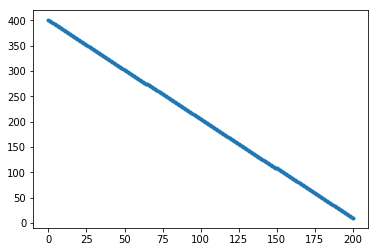

In [24]:
# point-wise Jacobi

import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import time as tm

gpt = 201

T = np.zeros(gpt)*0
T_old = np.zeros(gpt)


# boundary condition
T[0] = 400
T[gpt-1] = 10

resd = np.zeros(gpt-1)

nrm = []

tbg = tm.time()

iter = 1
cnt = 1
# while iter < 2:
#T_old[0:gpt] = T[0:gpt]
for iter in range(100000):
    T_old[0:gpt] = T[0:gpt]
 
    for i in range(1,gpt-1):
        T[i] = (0 - (T_old[i-1]+T_old[i+1]))/(-2)
        T_old[i] = T[i]
    for i in range(1,gpt-1):
        resd[i] = T[i-1]-2*T[i]+T[i+1]
    
    
    nrm.append(np.linalg.norm(resd[1:gpt-1],2))
    

    if nrm[-1] < 1.0e-5:
        break

ted = tm.time()

# print(ted-tbg,err,iter)
print(iter,ted-tbg,nrm[-1])

plt.plot(T,'.-')   

**How many iterations does your code take to solve the matrix equation in poit-wise Gauss-Siedel relaxation? How long does your computer solve the equation? How much faster does the Gauss-Siedel method compared to the Jacobi method, in number of iterations and computer time? **

**Your answer:** 44828 iterations are needed to take to solve the matrix equation in point-wise Gauss-Siedel relaxation. 16 seconds are taken to solve this equation.  While, 92558 iterations are needed to solve it in Point-wise Jacobi relaxation. and 30 seconds are needed to solve this equation.  Thus, Gauss-Siedel method seems to run twice as fast as Jacobi method.

**Convert your code to vectorized calculation for relaxation method. Run your code and see the time and number of iterations. Do your vectorized code run as Jacobi method or Gauss-Siedel method? What is your cpu time per iteration, comapred to the linear loop relaxation?**

92558 1.5780420303344727 9.999639812168847e-06


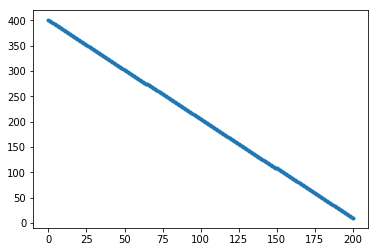

In [26]:
# ###############################
# vectorized relaxation code
# ###############################

import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import time as tm

gpt = 201

T = np.zeros(gpt)*0
T_old = np.zeros(gpt)


# boundary condition
T[0] = 400
T[gpt-1] = 10

resd = np.zeros(gpt-1)

nrm = []

tbg = tm.time()

iter = 1
cnt = 1
# while iter < 2:
#T_old[0:gpt] = T[0:gpt]
for iter in range(100000):
    T_old[0:gpt] = T[0:gpt]
 
    T[1:gpt-1] = (0 - (T_old[0:gpt-2]+T_old[2:gpt]))/(-2)
        
    resd[1:gpt-1] = T[0:gpt-2]-2*T[1:gpt-1]+T[2:gpt]
    
    
    nrm.append(np.linalg.norm(resd[1:gpt-1],2))
    

    if nrm[-1] < 1.0e-5:
        break

ted = tm.time()

# print(ted-tbg,err,iter)
print(iter,ted-tbg,nrm[-1])

plt.plot(T,'.-')   


**Your answer: ** I vectorized my code in Jacobi method, the iteration is still 92558, as expected and the same, but running time is 1.5780420303344727, which is approximately 1/20 as fast as orginal one. 

---
### Problem 3:
**In ionic solutions, cations and anions are driven by both diffusion and eletromigration, if convection is ignored. Their concentration evolution are governed by the Nernst-Planck equation:**

$$\frac{\partial C_+}{\partial t} = D_+ \nabla^2 C_+ + m_+ \nabla \cdot C_+ \nabla \phi $$

$$\frac{\partial C_-}{\partial t} = D_- \nabla^2 C_- - m_- \nabla \cdot C_- \nabla \phi, $$

**where the electrical potential is governed by Poisson's equation:**

$$ \nabla^2 \phi = - \frac{\rho}{\varepsilon} = - \frac{F}{\varepsilon} (C_+ - C_- ). $$

**The first and second terms on the right-hand side of the Nernst-Planck equation are the diffusion and migration terms.   **

**<font color=red>Question</font>: Type the finite difference stencils for the three equations above. Central difference for spatial and Euler scheme for temporal discretizations.** 

Hint: The migration term is similar to the case of non-constant diffusivity problem in Part 3 of Day05 InClass Assignment. 

**Your answer:** $$\frac{C_{i,j}^{n+1}-C_{i,j}^{n}}{\Delta t} = D \bigg( \frac{C_{i-1,j}^n - 2 C_{i,j}^n + C_{i+1,j}^n}{\Delta x^2} + \frac{C_{i,j-1}^n - 2 C_{i,j}^n + C_{i,j+1}^n}{\Delta y^2} \bigg) + \frac{m}{\Delta x}\bigg( \frac{C_{i+1,j}+C_{i,j}}{2} \cdot \frac{\phi_{i+1,j}^n - \phi_{i,j}^n}{\Delta x} - \frac{C_{i,j}+C_{i-1,j}}{2} \cdot \frac{\phi_{i,j}^n + \phi_{i-1,j}^n}{\Delta x}\bigg) + \\  \frac{m}{\Delta y}\bigg( \frac{C_{i,j+1}+C_{i,j}}{2} \cdot \frac{\phi_{i,j+1}^n - \phi_{i,j}^n}{\Delta y} - \frac{C_{i,j}+C_{i,j-1}}{2} \cdot \frac{\phi_{i,j}^n + \phi_{i,j-1}^n}{\Delta y}\bigg)$$

$$\frac{\phi_{i-1,j}-2\phi_{i,j}+\phi_{i+1,j}}{\Delta x^2} + \frac{\phi_{i,j-1}-2\phi_{i,j}+\phi_{i,j+1}}{\Delta y^2} = -\frac{F}{\epsilon}\big(C_+-C_-\big)$$

As the first two equations are almost the same, I just wrote one.

**<font color=red>Question</font>: Now, let us simulate the cation and anion concentration evolution and electropoential in a 2D domain given below. Assume that $F/\varepsilon = 20.$ We can use some Python functions previously developed for Day08 InClass assignment. Please load necessaray libraries, include functions (such as PoissonEqn_2d and Laplace_2d), and complete the missing code to make the main code work. **

**The boundary conditions are as below.**

$$\phi = 10 ~~\in~~ x = 0 ~~~~\text{and}~~~~ \phi = 0 ~~\in~~ x = 4. $$

$$\frac{\partial \phi}{\partial y} = 0 ~~\in~~ y = 0 ~~~~\text{and}~~~~\frac{\partial \phi}{\partial y} = 0 ~~\in~~ y = 3. $$

<img src="BC_phi.png" alt = "drawing" width=400 align="center"/>

**No flux boundary conditions for $C_+$ and $C_-$ on the computational domain.**

In [21]:
# load library
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output
import numpy as np
import time


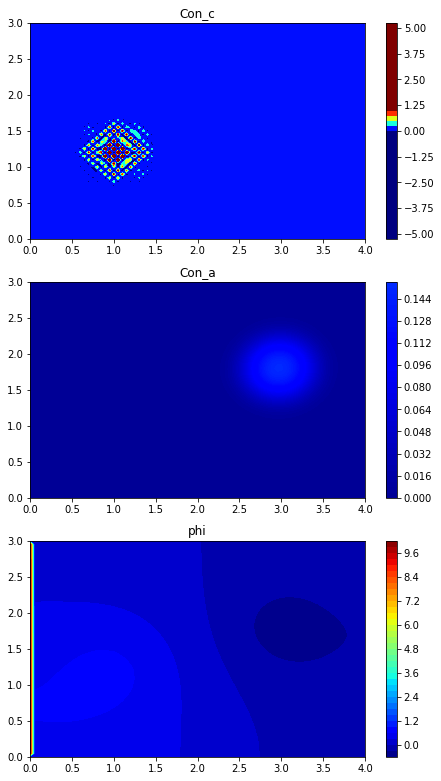

time =  0.22000000000000006


In [ ]:
# #######################
# main code
# #######################

# spatial discretization
nx = 81+0
Xg = np.linspace(0, 4, nx)

ny = 61+0
Yg = np.linspace(0, 3, ny)

# meshgrid generate the x and y coordinates of the 2D grid system
xmsh, ymsh = np.meshgrid(Xg, Yg)

dx = Xg[2] - Xg[1]
dy = Yg[2] - Yg[1]

print('dx = ', dx, '; dy = ', dy)

# potential field and charge density
phi = np.zeros((ny,nx))

dp_dx = np.zeros((ny,nx))
dp_dy = np.zeros((ny,nx))

# arrays for cation and anion concentrations
Con_c = np.zeros((ny,nx))
Con_a = np.zeros((ny,nx))

# arrays for cation and anion migration terms
dCdP_c = np.zeros((ny,nx))
dCdP_a = np.zeros((ny,nx))

# arrays for cation and anion diffusion terms
Lp_c = np.zeros((ny,nx))
Lp_a = np.zeros((ny,nx))

b = np.zeros((ny,nx))

# initial concentration 
Con_c[0:ny,0:nx] = np.exp( -((xmsh[0:ny,0:nx]-1.0)**2 + (ymsh[0:ny,0:nx]-1.2)**2)*40 )
Con_a[0:ny,0:nx] = np.exp( -((xmsh[0:ny,0:nx]-3.0)**2 + (ymsh[0:ny,0:nx]-1.8)**2)*40 )


# material parameters
D_c = 0.1
D_a = 0.075
m_c = 1.0
m_a = 0.75
F_ep = 20.0

tm = 0.0
dt = 1.0e-2

for iter in range(402):
    

    # Lap of cation concentration
    Lp_c = Laplace_2d(nx,ny,dx,dy,Con_c)
    Lp_a = Laplace_2d(nx,ny,dx,dy,Con_a)

    # solving potential field
    b[0:ny,0:nx] = -F_ep*(Con_c[0:ny,0:nx] - Con_a[0:ny,0:nx])
    phi[0:ny,0:nx], cnt = PoissonEqn_2d(nx,ny,dx,dy,b[0:ny,0:nx],phi[0:ny,0:nx],1.0e-2)    
    
    # electro-migration term
    dCdP_c = ScdDeriv_2d(nx,ny,dx,dy,Con_c,phi)
    dCdP_a = ScdDeriv_2d(nx,ny,dx,dy,Con_a,phi)
        

    # update concentration
    Con_c[1:ny-1,1:nx-1] = Con_c[1:ny-1,1:nx-1] + dt*(D_c*Lp_c[1:ny-1,1:nx-1] + m_c*dCdP_c[1:ny-1,1:nx-1])
    Con_a[1:ny-1,1:nx-1] = Con_a[1:ny-1,1:nx-1] + dt*(D_a*Lp_a[1:ny-1,1:nx-1] - m_a*dCdP_a[1:ny-1,1:nx-1])
    
    # no-flux boundary conditions for Con_c and Con_a
    # add your BCs below
    for i in range(1,ny-1):
        phi[i,0] = 10
        phi[i,nx-1] = 0
    for j in range(1,nx-1):
        phi[0,j] = phi[1,j]
        phi[ny-1,j] = phi[ny-2,j]
    
    
    # update time
    tm = tm + dt
    # plotting results
    
    if iter%5 == 1:
        plot_contr_2d(tm, xmsh, ymsh, Con_c, Con_a, phi) 
    

In [39]:
# #######################################
# function for plotting results
# #######################################

def plot_contr_2d(tm, xmsh, ymsh, Cc, Ca, p):
    
    clear_output(wait=True) # Clear output for dynamic display
    
    plt.figure(figsize=(7.5, 13.5))
    # concetration of cation
    plt.subplot(311)
    plt.contourf(xmsh,ymsh,Con_c, 40,cmap=cm.jet, vmin=-0.02, vmax =1.02)
    plt.colorbar()
    plt.title('Con_c')

    # concetration of anion
    plt.subplot(312)
    plt.contourf(xmsh,ymsh,Con_a, 40,cmap=cm.jet, vmin=-0.02, vmax =1.02)
    plt.colorbar()
    plt.title('Con_a')

    # electropotential
    plt.subplot(313)
    plt.contourf(xmsh,ymsh,phi, 40,cmap=cm.jet)
    plt.colorbar()
    plt.title('phi')
    
    plt.show()
    print('time = ', tm)
    time.sleep(0.01)



In [23]:
# #######################################
# function for calculating the migration term
# #######################################

# input C is the concentration
# input P is the electropotential

def ScdDeriv_2d(nx,ny,dx,dy,C,P):

    dCdP = np.zeros((ny,nx))
    
    dCdP[1:ny-1,1:nx-1] = ((C[2:ny,1:nx-1]+C[1:ny-1,1:nx-1])*(P[2:ny,1:nx-1]-P[1:ny-1,1:nx-1]) - \
                           (C[1:ny-1,1:nx-1]+C[0:ny-2,1:nx-1])*(P[1:ny-1,1:nx-1]-P[0:ny-2,1:nx-1]))/(2*dx**2) + \
                          ((C[1:ny-1,2:nx]+C[1:ny-1,1:nx-1])*(P[1:ny-1,2:nx]-P[1:ny-1,1:nx-1]) - \
                           (C[1:ny-1,1:nx-1]+C[1:ny-1,0:nx-2])*(P[1:ny-1,1:nx-1]-P[1:ny-1,0:nx-2]))/(2*dy**2)# <== fill the blank
    
    return dCdP

In [24]:
# #######################################
# function for calculating Laplace
# #######################################
def Laplace_2d(nx,ny,dx,dy,f):
    
    # complete the code
    Lap = np.zeros((ny,nx))
    
    Lap[1:ny-1,1:nx-1] = (f[1:ny-1,0:nx-2] - 2*f[1:ny-1,1:nx-1] + f[1:ny-1,2:nx])/dy**2 + \
                         (f[0:ny-2,1:nx-1] - 2*f[1:ny-1,1:nx-1] + f[2:ny,1:nx-1])/dx**2

    return Lap


In [25]:
# #######################################
# function for solving Poisson's equation
# #######################################
def PoissonEqn_2d(nx,ny,dx,dy,b,p,norm_target):
    
    resd = np.zeros((ny,nx))
    tmp = np.zeros((ny,nx))
    sol = np.zeros((ny,nx))
    
    cnt = 0
    nrm = 1.0
    while nrm > norm_target:
        
        # point-wise relaxation
        p[1:ny-1,1:nx-1] = (-(dx**2)*(dy**2)*b[1:ny-1,1:nx-1]+dx**2*(p[1:ny-1,0:nx-2] + \
                           p[1:ny-1,2:nx])+dy**2*(p[0:ny-2,1:nx-1]+p[2:ny,1:nx-1])) \
                           /(2*(dx**2+dy**2))# <== fill the blank
            
        # boundary condition for pressure
        p[1:ny-1,0]    = p[1:ny-1,1]         # at x = 0
        p[1:ny-1,nx-1] = p[1:ny-1,nx-2]         # at x = 2
        p[0,1:nx-1]    = p[1,1:nx-1]         # at y = 0
        p[ny-1,1:nx-1]    = 0        # at y = 2
        
        
        # residual
        tmp = Laplace_2d(nx,ny,dx,dy,p)
        resd[1:ny-1,1:nx-1] = tmp[1:ny-1,1:nx-1] - b[1:ny-1,1:nx-1]
        nrm = np.linalg.norm(resd[1:ny-1,1:nx-1])
        
        cnt = cnt + 1
    
    sol = p

    return sol, cnt



### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > Homework 02".